* [앤스컴 콰르텟 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%95%A4%EC%8A%A4%EC%BB%B4_%EC%BD%B0%EB%A5%B4%ED%85%9F)
* [Anscombe’s quartet — seaborn 0.11.2 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)
* [Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing](https://www.autodesk.com/research/publications/same-stats-different-graphs)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png" width="400">

## 라이브러리 로드

In [1]:
# pandas, seaborn, numpy
import pandas as pd
import seaborn as sns
import numpy as np

## 데이터 로드

In [2]:
# df = sns.load_dataset("anscombe")
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv")
df.shape

(44, 3)

## 일부 데이터만 가져오기

In [3]:
# head
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [4]:
df.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95


In [5]:
# tail
df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [6]:
df.tail(2)

,dataset,x,y
42,IV,8.0,7.91
43,IV,8.0,6.89


In [7]:
# sample
df.sample(3)

,dataset,x,y
10,I,5.0,5.68
31,III,7.0,6.42
28,III,6.0,6.08


## 기본 정보 보기

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [9]:
# 기술통계 보기 describe
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [10]:
# 기술통계 보기 describe - object
df.describe(include="object")

,dataset
count,44
unique,4
top,I
freq,11


## dataset

In [11]:
# bool Indexing
# df_1, df_2, df_3, df_4 만들기
df_1=df[df["dataset"]=="I"]
df_2=df[df["dataset"]=="II"]
df_3=df[df["dataset"]=="III"]
df_4=df[df["dataset"]=="IV"]
df_1.shape,df_2.shape,df_3.shape,df_4.shape

((11, 3), (11, 3), (11, 3), (11, 3))

## 개별 데이터셋의 기술통계

In [12]:
# df_1.describe
df_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [13]:
df_2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [14]:
df_3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [15]:
df_4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [16]:
# df_1.corr
df_1.corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [17]:
df_2.corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [18]:
df_3.corr()

,x,y
x,1.000000,0.816287
y,0.816287,1.000000


In [19]:
df_4.corr()

,x,y
x,1.000000,0.816521
y,0.816521,1.000000


## Series의 빈도수

In [20]:
# value_counts를 통해 dataset 의 빈도수 구하기
df["dataset"].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [21]:
# value_counts를 통해 dataset 의 빈도수 normalize로 비율 구하기
df["dataset"].value_counts(normalize=True)

I      0.25
II     0.25
III    0.25
IV     0.25
Name: dataset, dtype: float64

## Groupby 를 통한 dataset 별 기술통계

In [22]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [23]:
# desc = df.groupby("dataset")[["x", "y"]].describe()
desc = df.groupby("dataset")[["x", "y"]].describe()
desc

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

## 상관 계수

In [24]:
df.groupby("dataset").corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

## seaborn 시각화
### countplot

<AxesSubplot:xlabel='dataset', ylabel='count'>

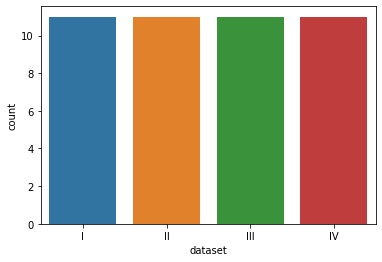

In [25]:
# countplot 그리기
sns.countplot(data=df, x="dataset")

<AxesSubplot:xlabel='count', ylabel='dataset'>

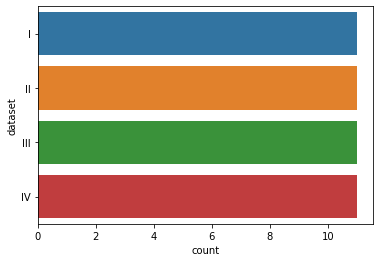

In [26]:
# 축을 변경해 그리기
sns.countplot(data=df, y="dataset")

### barplot

<AxesSubplot:xlabel='dataset', ylabel='y'>

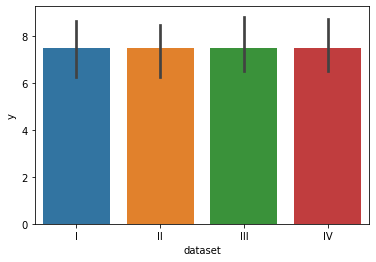

In [27]:
# 기본값 : 평균
# 검은색 막대 : 신뢰구간
sns.barplot(data=df, x="dataset", y="y")

<AxesSubplot:xlabel='dataset', ylabel='x'>

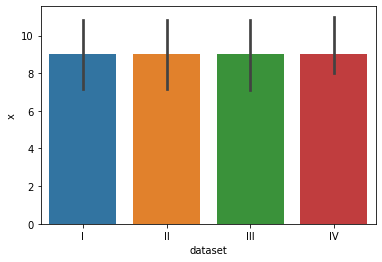

In [28]:
sns.barplot(data=df, x="dataset", y="x")

<AxesSubplot:xlabel='dataset', ylabel='y'>

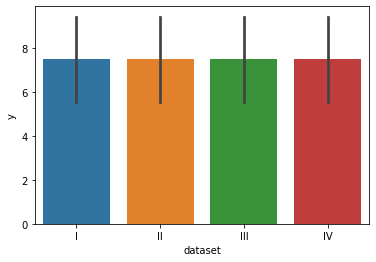

In [29]:
sns.barplot(data=df, x="dataset", y="y", ci="sd")

<AxesSubplot:xlabel='dataset', ylabel='y'>

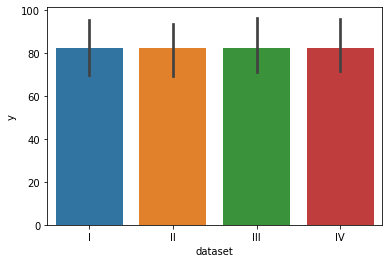

In [30]:
# sns.barplot(data=df, x="dataset", y="y", ci="sd")
# np.sum: 합계
sns.barplot(data=df, x="dataset", y="y", estimator=np.sum)

In [31]:
# groupby 를 통계 barplot의 y 값 직접 구하기
df.groupby("dataset")[["x","y"]].mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### boxplot

<AxesSubplot:xlabel='dataset', ylabel='y'>

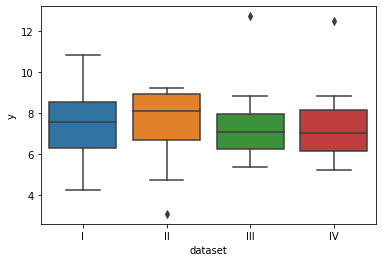

In [32]:
#이상치를 보고자 할 때
sns.boxplot(data=df,x="dataset",y="y")

### violinplot

<AxesSubplot:xlabel='dataset', ylabel='y'>

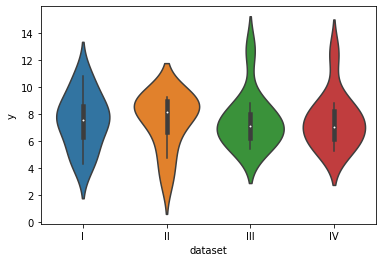

In [33]:
#하얀점=중앙값
sns.violinplot(data=df,x="dataset",y="y")

### scatterplot

<AxesSubplot:xlabel='x', ylabel='y'>

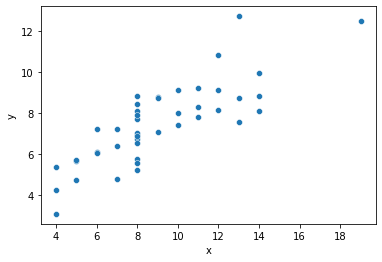

In [34]:
sns.scatterplot(data=df,x="x",y="y")

<AxesSubplot:xlabel='x', ylabel='y'>

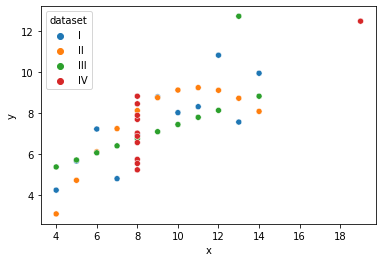

In [35]:
sns.scatterplot(data=df,x="x",y="y", hue="dataset")

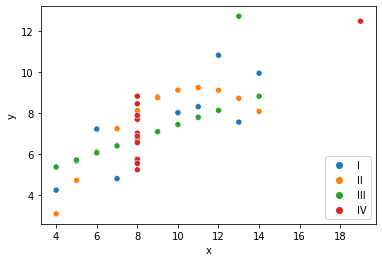

In [36]:
import matplotlib.pyplot as plt

sns.scatterplot(data=df,x="x",y="y", hue="dataset")
plt.legend(loc=4)

### regplot

<AxesSubplot:xlabel='x', ylabel='y'>

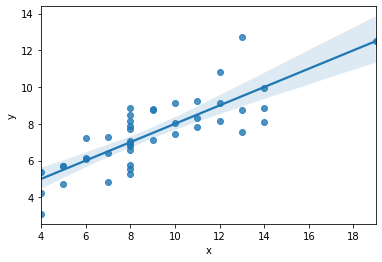

In [37]:
sns.regplot(data=df,x="x",y="y")

### lmplot

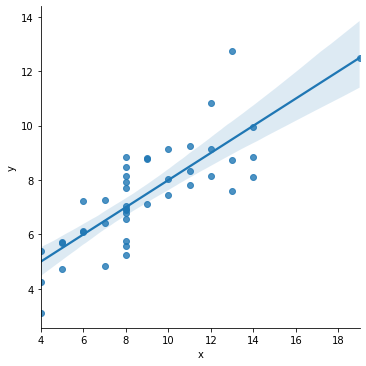

In [38]:
sns.lmplot(data=df,x="x",y="y")

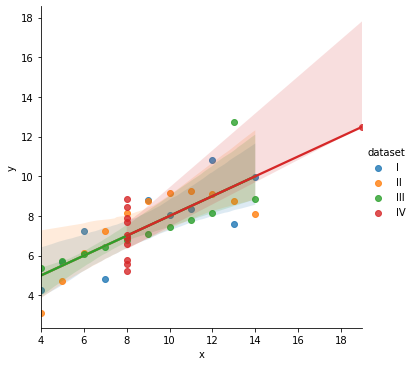

In [39]:
sns.lmplot(data=df,x="x",y="y",hue="dataset")

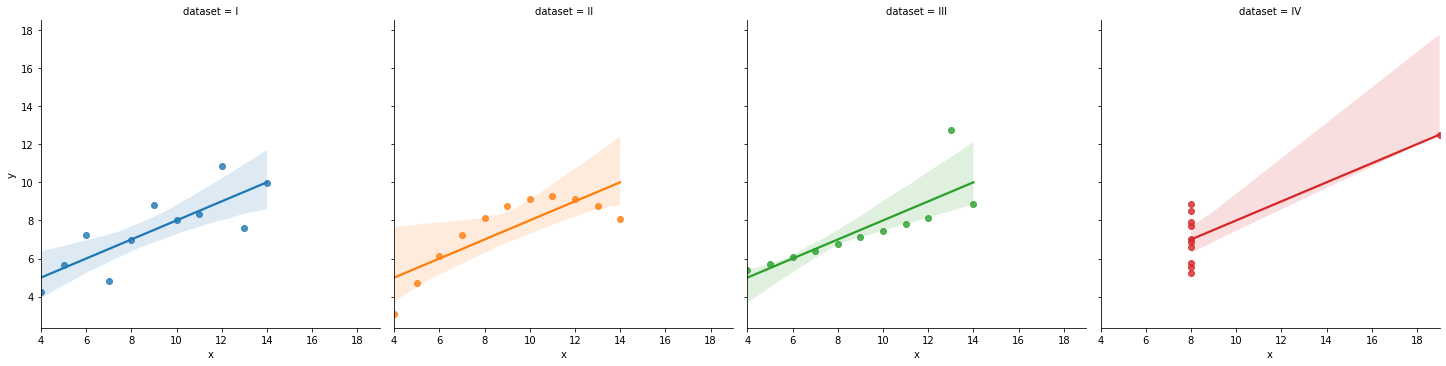

In [40]:
sns.lmplot(data=df,x="x",y="y",hue="dataset", col="dataset")

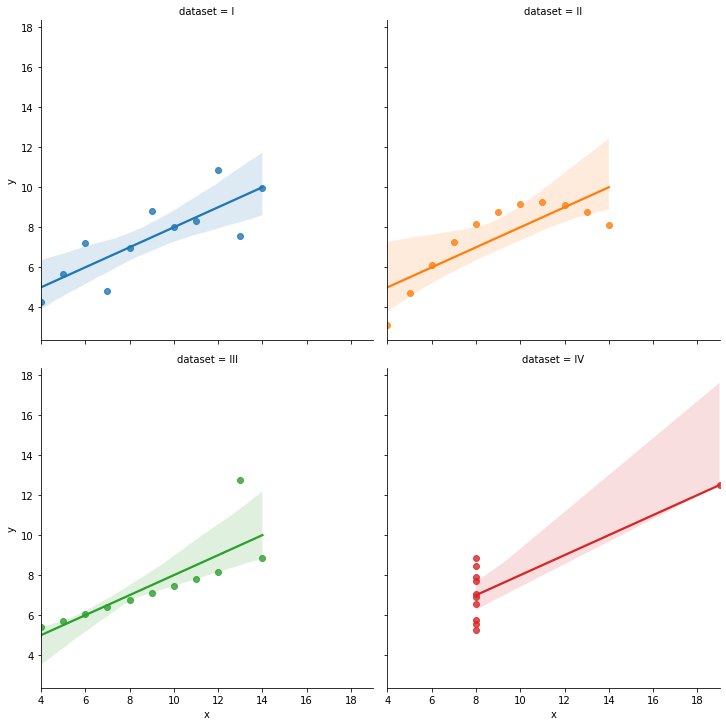

In [41]:
sns.lmplot(data=df,x="x",y="y",hue="dataset", col="dataset", col_wrap=2)

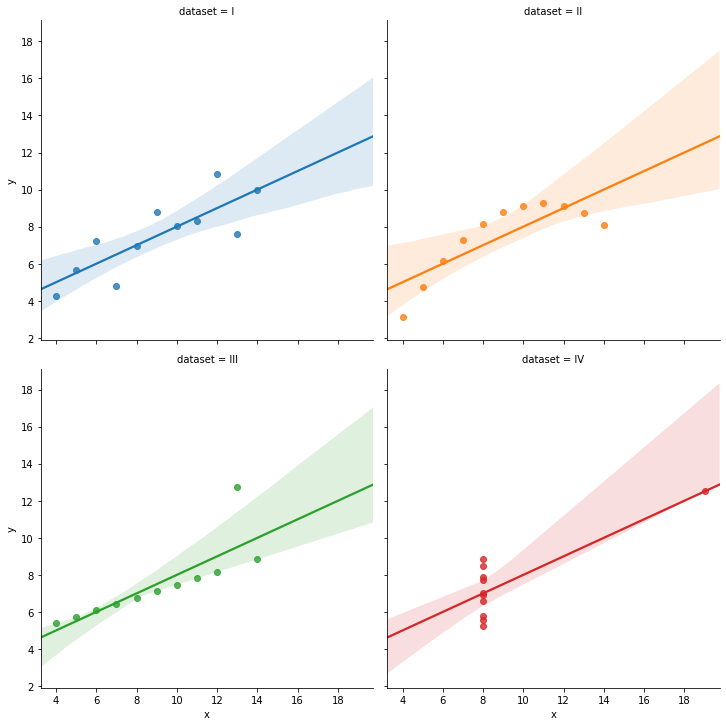

In [42]:
sns.lmplot(data=df,x="x",y="y",hue="dataset", col="dataset", col_wrap=2, truncate=False)

[Anscombe’s quartet — seaborn 0.11.2 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)